<a href="https://colab.research.google.com/github/Om4587/Scientific-Analysis/blob/main/Project_3(Statistics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# print a list of unique values per feature
for i in data.keys():
  print(f"Column {i} has {len(np.unique(data[i]))} unique values")


Column fixed acidity has 96 unique values
Column volatile acidity has 143 unique values
Column citric acid has 80 unique values
Column residual sugar has 91 unique values
Column chlorides has 153 unique values
Column free sulfur dioxide has 60 unique values
Column total sulfur dioxide has 144 unique values
Column density has 436 unique values
Column pH has 89 unique values
Column sulphates has 96 unique values
Column alcohol has 65 unique values
Column quality has 6 unique values


/tmp/ipython-input-3957076060.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


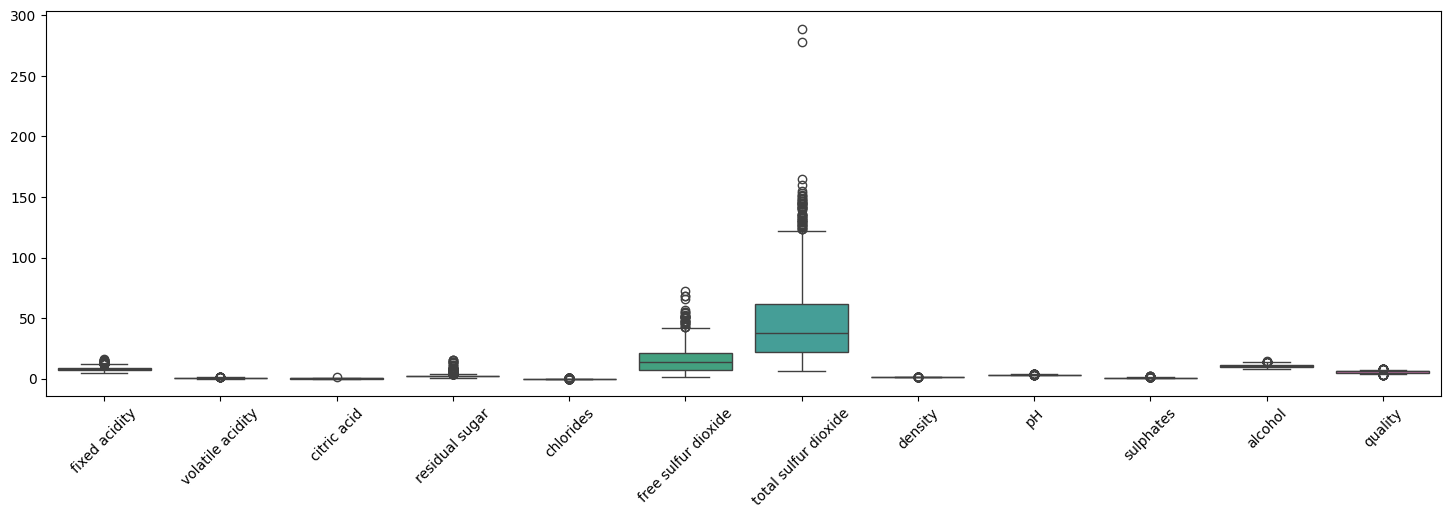

In [5]:
fig,ax = plt.subplots(1,figsize = (18,5))

ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

In [7]:
data = data[ data['total sulfur dioxide'] < 200 ]

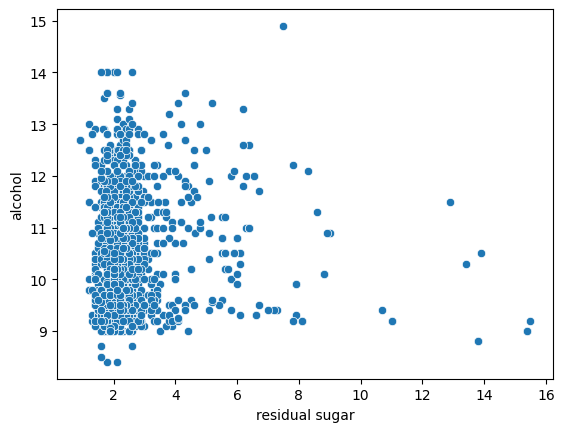

In [8]:
# visual data exploration
sns.scatterplot(x=data['residual sugar'],y=data['alcohol'])
plt.show()

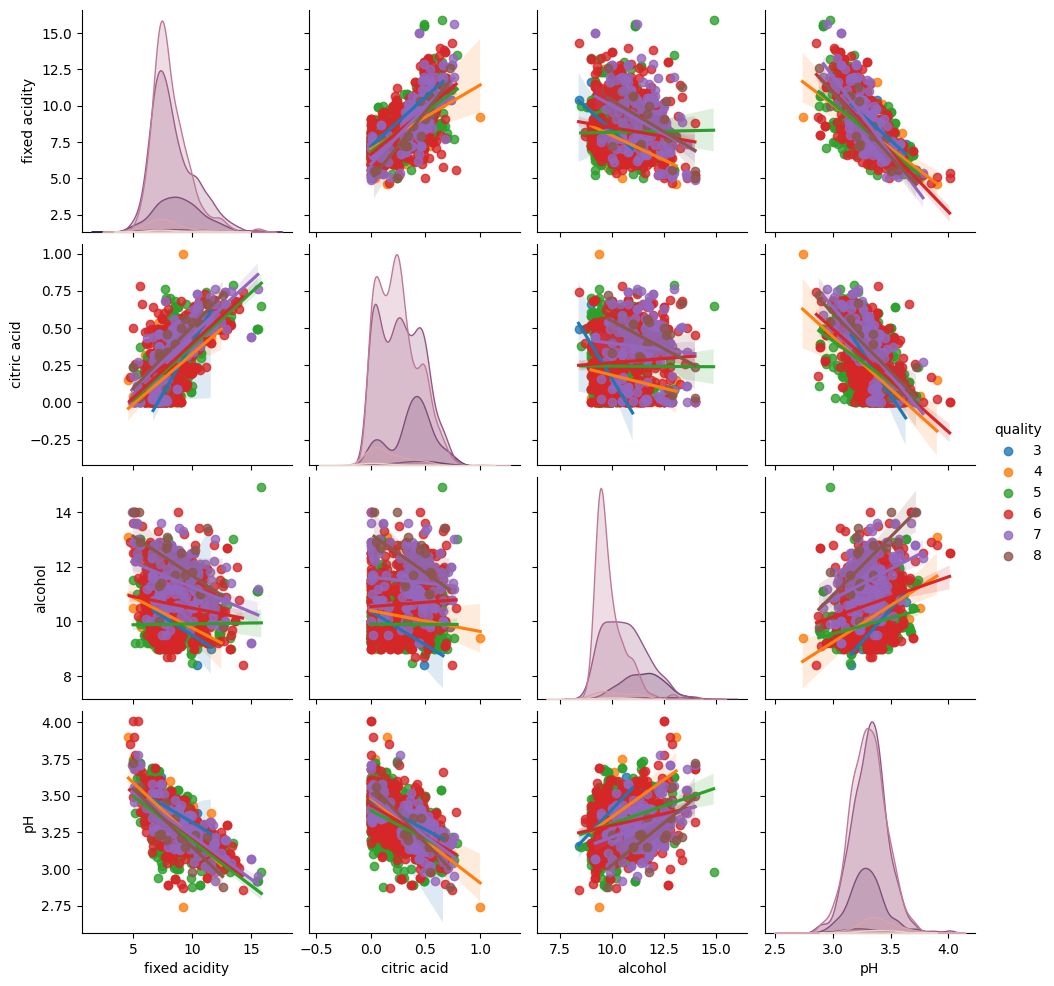

In [9]:
cols2plot = ['fixed acidity','citric acid','alcohol','pH','quality']
sns.pairplot(data[cols2plot],kind = 'reg',hue = 'quality')
plt.show()

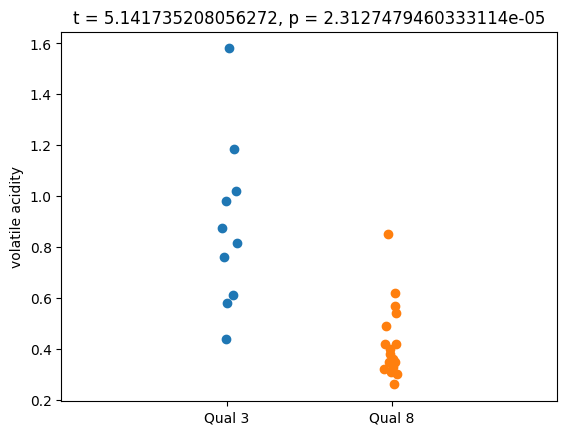

In [49]:
# Extract the data
x = data['volatile acidity'][data['quality'] == 3]
y = data['volatile acidity'][data['quality'] == 8]

# T test
ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30,x,'o',
         np.random.randn(len(y))/30+1,y,'o')

plt.xlim([-1,2])
plt.xticks([0,1], labels = ['Qual 3', 'Qual 8'])
plt.ylabel('volatile acidity')
plt.title(f't = {ttest[0]}, p = {ttest[1]}')
plt.show()

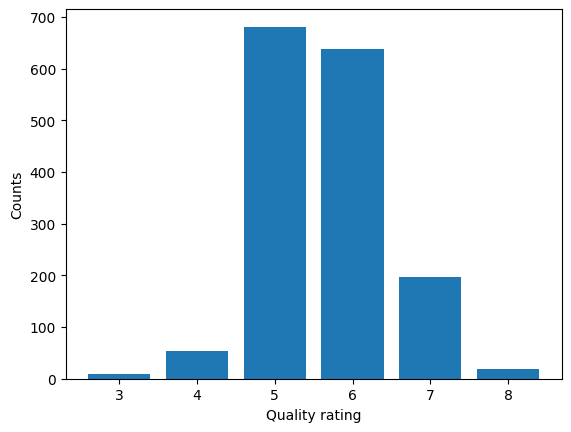

In [50]:
qualcount = np.zeros(6)

n = 0
for i in range(3,9):
  qualcount[n] = len(data[data['quality']==i])
  n += 1

plt.bar(range(3,9),qualcount)
plt.xlabel('Quality rating')
plt.ylabel('Counts')
plt.show()

<BarContainer object of 6 artists>

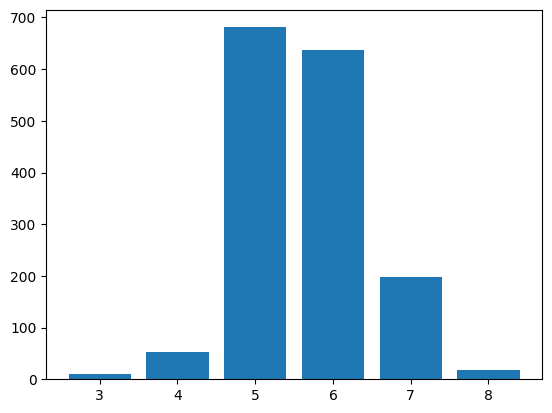

In [51]:
count = data['quality'].value_counts()

plt.bar(list(count.keys()),count)

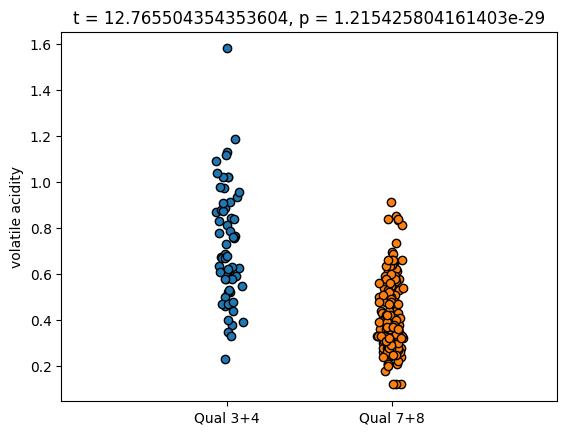

In [54]:
# Extract the data
x = data['volatile acidity'][(data['quality'] == 3) | (data['quality'] == 4)]
y = data['volatile acidity'][(data['quality'] == 7) | (data['quality'] == 8)]

# T test
ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x))/30,x,'o',
         np.random.randn(len(y))/30+1,y,'o',
         markeredgecolor = 'k')

plt.xlim([-1,2])
plt.xticks([0,1], labels = ['Qual 3+4', 'Qual 7+8'])
plt.ylabel('volatile acidity')
plt.title(f't = {ttest[0]}, p = {ttest[1]}')
plt.show()

In [55]:
import statsmodels.api as sm

In [63]:
dep_var = data['quality']
ind_vars = data.drop(labels = 'quality',axis = 1)

ind_vars = sm.add_constant(ind_vars)
model = sm.OLS(dep_var,ind_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          1.30e-145
Time:                        05:44:44   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


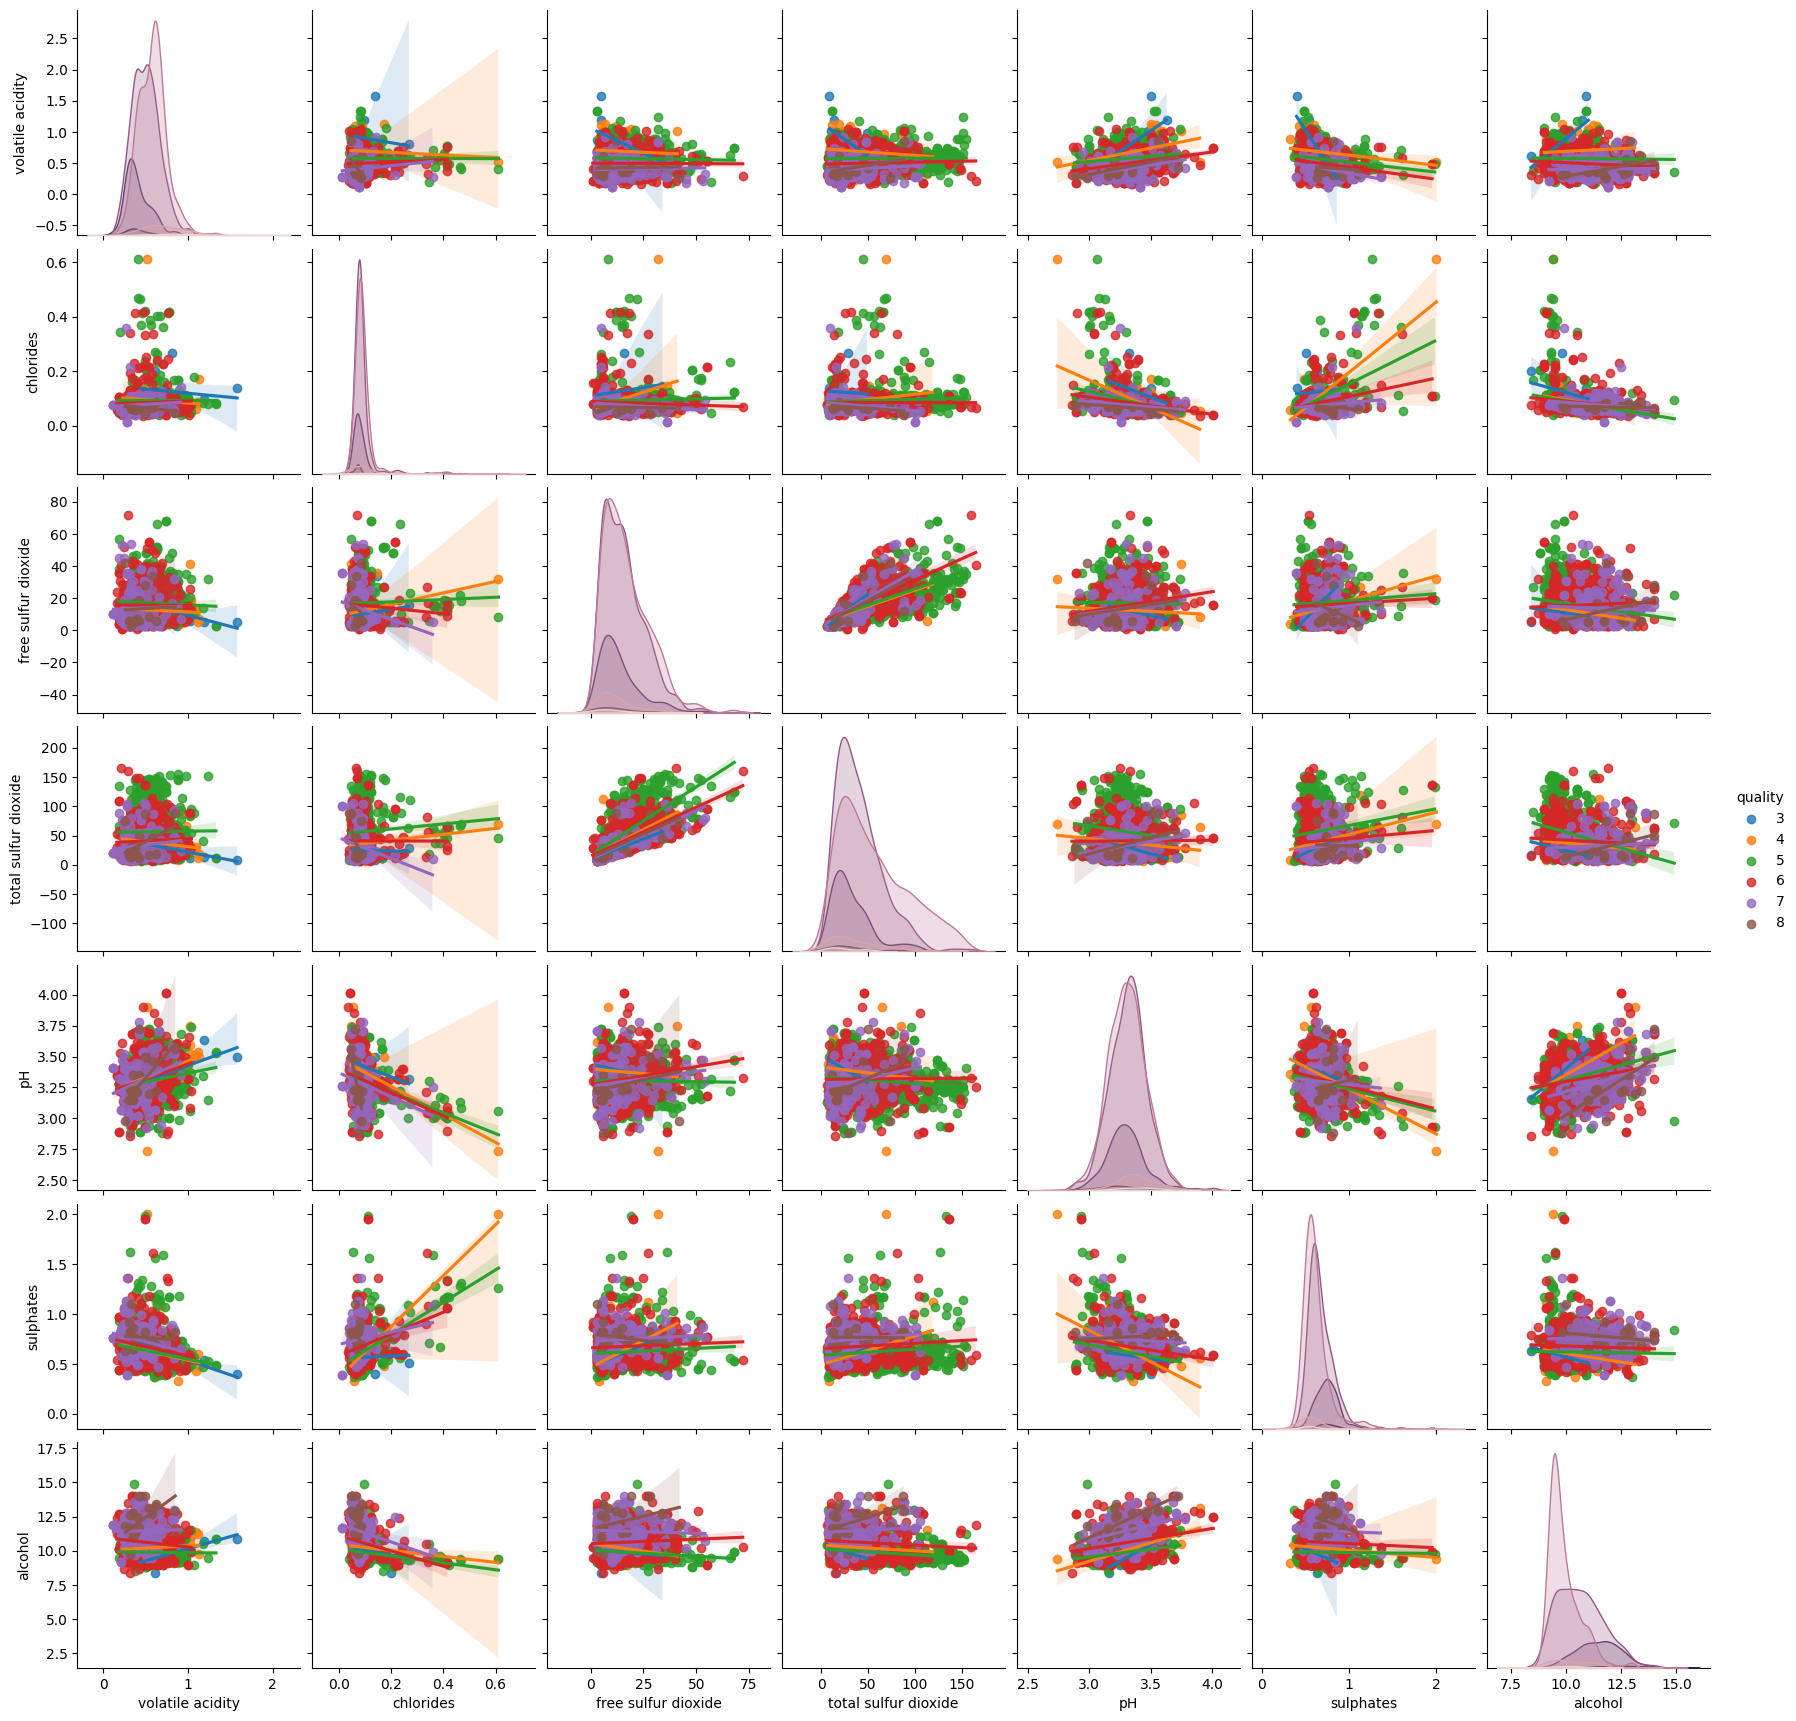

In [74]:
sig_cols = list(model.pvalues[model.pvalues<.05].keys())
[ print(i) for i in sig_cols ];

sig_cols.append('quality')

sns.pairplot(data[sig_cols],kind = 'reg',hue = 'quality')

In [77]:
binthres = np.mean(data['quality'])

data['binquality'] = data['quality']>binthres
data

/tmp/ipython-input-1407914165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binquality'] = data['quality']>binthres


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [103]:
Xcols = []
for key in data.keys():
  if key not in ['quality', 'binquality']:
    Xcols.append(key)

Xcols


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [88]:
model = sm.Logit(data['binquality'],data[Xcols])

results = model.fit(method = 'newton')

results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Sat, 17 Jan 2026   Pseudo R-squ.:                  0.2525
Time:                        06:05:33   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [104]:
sig_colsL = list(results.pvalues[results.pvalues<.05].keys())

print("Significant predictors from the logistic regression:")
[ print("  "+i) for i in sig_colsL ];

print('  ')

print("Significant predictors from the Standard regression:")
[ print("  "+i) for i in sig_cols[:-1] ];

Significant predictors from the logistic regression:
  volatile acidity
  citric acid
  chlorides
  free sulfur dioxide
  total sulfur dioxide
  density
  sulphates
  alcohol
  
Significant predictors from the Standard regression:
  volatile acidity
  chlorides
  free sulfur dioxide
  total sulfur dioxide
  pH
  sulphates
  alcohol


In [105]:
## Guassian

In [128]:
n = 500

x = np.cumsum( np.random.randn(n) )
y = (stats.rankdata(x)/(n+1) - .5)*2
y = np.arctanh(y)

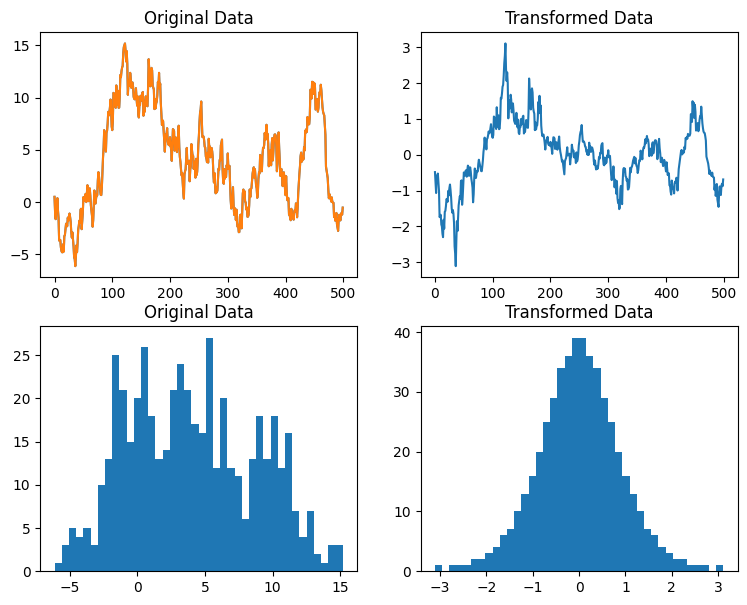

In [130]:
fig,ax = plt.subplots(2,2,figsize = (9,7))

ax[0,0].plot(x)
ax[0,0].set_title('Original Data')

ax[0,1].plot(y)
ax[0,1].set_title('Transformed Data')

ax[0,0].plot(x)
ax[0,0].set_title('Original Data')

ax[1,0].hist(x,bins = 40)
ax[1,0].set_title('Original Data')

ax[1,1].hist(y,bins = 40)
ax[1,1].set_title('Transformed Data')
plt.show()

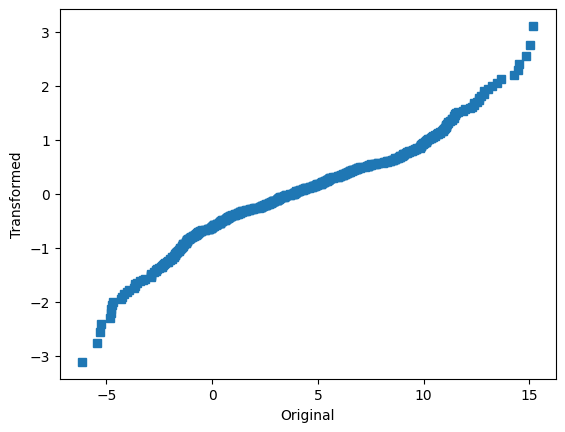

In [131]:
plt.plot(x,y,'s')
plt.xlabel('Original')
plt.ylabel('Transformed')
plt.show()